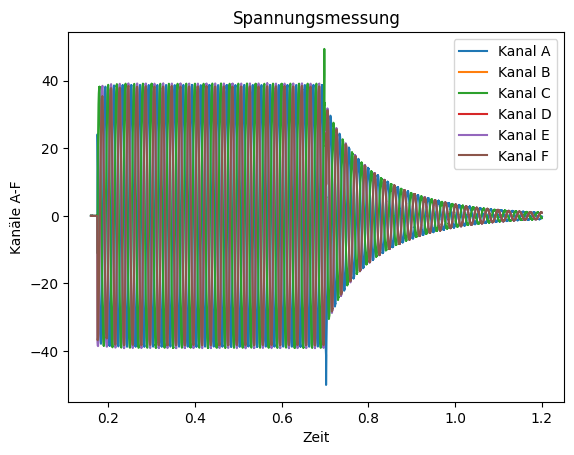

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

if __name__ == "__main__":
    csv_data = pd.read_csv("spannungmessung.csv", delimiter=';', decimal=',', skiprows=8000)
    csv_data.columns = ["Zeit", "Kanal A", "Kanal B", "Kanal C", "Kanal D", "Kanal E", "Kanal F"]
    csv_data = csv_data.apply(pd.to_numeric, errors='coerce')
    csv_data = csv_data.interpolate(method='linear', limit_direction='both')
    csv_data["Zeit"] = csv_data["Zeit"].astype(float)
    csv_data["Kanal A"] = csv_data["Kanal A"].astype(float)
    csv_data["Kanal B"] = csv_data["Kanal B"].astype(float)
    csv_data["Kanal C"] = csv_data["Kanal C"].astype(float)
    csv_data["Kanal D"] = csv_data["Kanal D"].astype(float)
    csv_data["Kanal E"] = csv_data["Kanal E"].astype(float)
    csv_data["Kanal F"] = csv_data["Kanal F"].astype(float)
    plt.plot(csv_data["Zeit"], csv_data["Kanal A"], label="Kanal A")
    plt.plot(csv_data["Zeit"], csv_data["Kanal B"], label="Kanal B")
    plt.plot(csv_data["Zeit"], csv_data["Kanal C"], label="Kanal C")
    plt.plot(csv_data["Zeit"], csv_data["Kanal D"], label="Kanal D")
    plt.plot(csv_data["Zeit"], csv_data["Kanal E"], label="Kanal E")
    plt.plot(csv_data["Zeit"], csv_data["Kanal F"], label="Kanal F")
    plt.xlabel("Zeit")
    plt.ylabel("Kanäle A-F")
    plt.title("Spannungsmessung")
    plt.legend()
    plt.show()


 



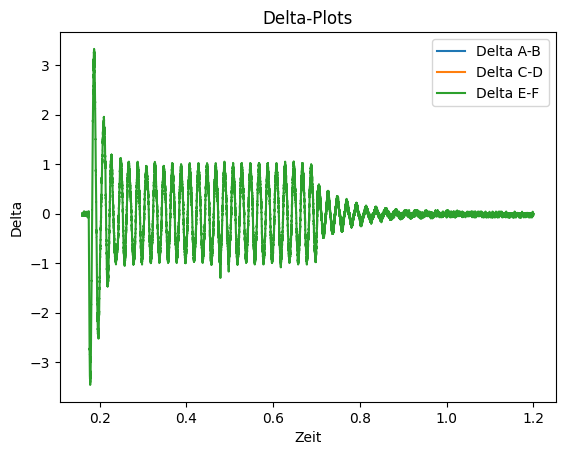

In [98]:

    delta_AB = csv_data["Kanal A"] - csv_data["Kanal B"]
    delta_CD = csv_data["Kanal C"] - csv_data["Kanal D"]
    delta_EF = csv_data["Kanal E"] - csv_data["Kanal F"]

    #delta_AB = delta_AB.fillna(delta_AB.mean())
    #delta_CD = delta_CD.fillna(delta_CD.mean())
    #delta_EF = delta_EF.fillna(delta_EF.mean())

    plt.plot(csv_data["Zeit"], delta_AB, label="Delta A-B")
    plt.plot(csv_data["Zeit"], delta_CD, label="Delta C-D")
    plt.plot(csv_data["Zeit"], delta_EF, label="Delta E-F")
    plt.xlabel("Zeit")
    plt.ylabel("Delta")
    plt.title("Delta-Plots")
    plt.legend()
    plt.show()


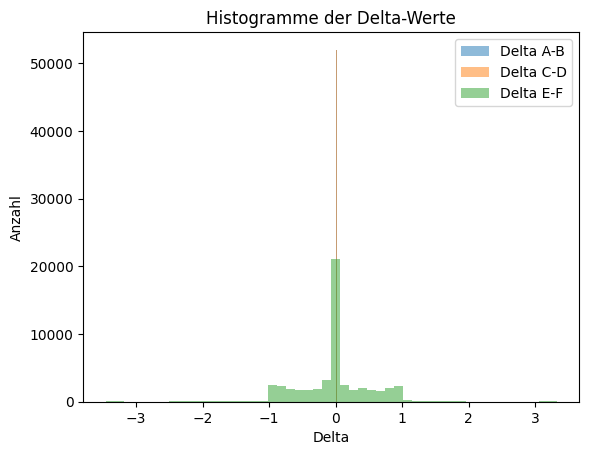

In [99]:
    with open('output.txt', 'w') as f:
        print('Delta A-B:', delta_AB, file=f)
        print('Delta C-D:', delta_CD, file=f)
        print('Delta E-F:', delta_EF, file=f)

    delta_AB = delta_AB.fillna(0)
    delta_CD = delta_CD.fillna(0)
    delta_EF = delta_EF.fillna(0)

    plt.hist(delta_AB, bins=50, alpha=0.5, label="Delta A-B")
    plt.hist(delta_CD, bins=50, alpha=0.5, label="Delta C-D")
    plt.hist(delta_EF, bins=50, alpha=0.5, label="Delta E-F")

    plt.xlabel("Delta")
    plt.ylabel("Anzahl")
    plt.title("Histogramme der Delta-Werte")
    plt.legend()
    plt.show()

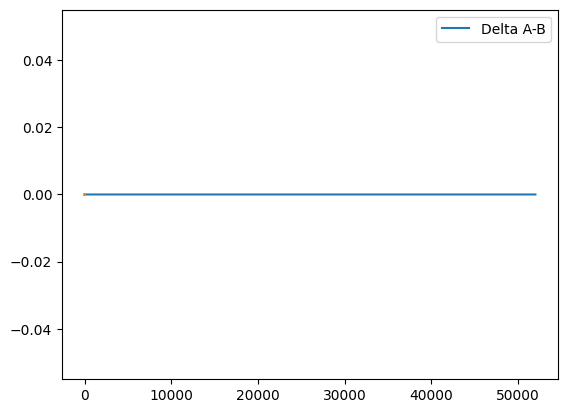

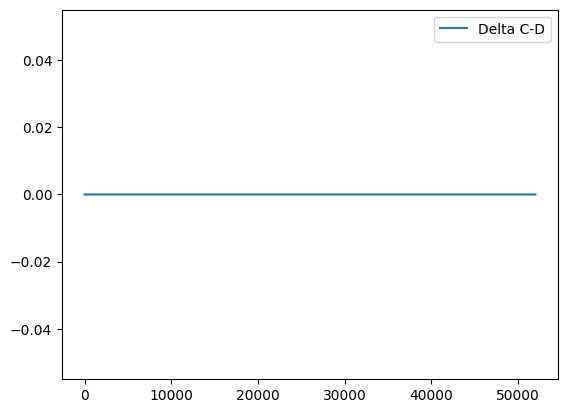

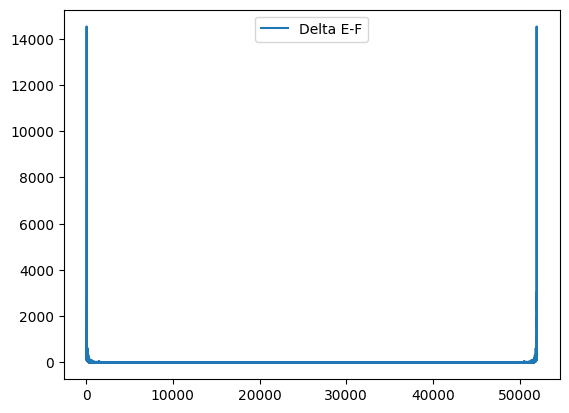

In [101]:
    # Compute FFT of Delta A-B
    fft_AB = np.fft.fft(delta_AB)
    freq = np.fft.fftfreq(len(delta_AB))
    # Compute FFT of Delta C-D
    fft_CD = np.fft.fft(delta_CD)
    freq = np.fft.fftfreq(len(delta_CD))
    # Compute FFT of Delta E-F
    fft_EF = np.fft.fft(delta_EF)
    freq = np.fft.fftfreq(len(delta_EF))
    # Plot FFTs
    plt.plot(np.abs(fft_AB), label="Delta A-B")
    plt.legend()
    plt.show()
    plt.plot(np.abs(fft_CD), label="Delta C-D")
    plt.legend()
    plt.show()
    plt.plot(np.abs(fft_EF), label="Delta E-F")
    plt.legend()
    plt.show()